In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

#Here we will build a function that will compute a score for each instagram user based on the scores of his posts(the mean)
path_1 = r'C:\Users\SOUKAINA LIDAM\Desktop\Viral_Marketing_Data\instagram_posts_0911_1111.csv' #using only the first Database
df_1 = pd.read_csv(path_1)
def indice_calcul(path_1,alpha,beta,N):    #This function compute 'tau' for each user having a post
    df=pd.read_csv(path_1) #opening the data base using pandas
    dict1={}
    id_uti=df['id_user']
    Nbviews=df['views']
    Nbrepo=df['reposts']
    Nblikes=df['likes']
    Nbcomments=df['comments']
    n=len(id_uti)
    dict2={}
    for i in range(n):
        if id_uti[i] not in dict1:
            dict1[id_uti[i]]=[(alpha*Nbrepo[i]+beta*Nbcomments[i])/N] #we can add to this formula number of donations and clicks if they are available
        else:
            dict1[id_uti[i]].append((alpha*Nbrepo[i]+beta*Nbcomments[i])/N)
    m=len(dict1)
    for i in range(m):      #comupte the mean of tau (KPI) for each user if he has multiple posts
        dict2[id_uti[i]]=np.mean(dict1[id_uti[i]])
    dict3=sorted(dict2.items(), key=lambda t: t[1])  #order the users based on their KPI
    return dict2,dict3[-600:]
D,DD=indice_calcul(path_1,0.8,0.3,1194)
####Create a dictinary which contains The KPI of all the users
####Create a list whose elements are tuple, contains every ID of all the users


In [8]:
#here we are going to plot the distribution of the users according to their scores to have a general idea about the score values
rank = []
for i in D.keys():
    rank.append(D[i])

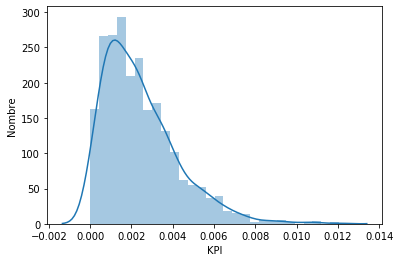

In [13]:
plt.xlabel('KPI')
plt.ylabel('Nombre')
sns.distplot(rank)
plt.savefig(r'C:\Users\SOUKAINA LIDAM\Desktop\repartition')
####The graph of distribution of all the users according to their scores before the release of the new dataset

In [14]:
#we notice that a few number of users having higher score

In [15]:
#here we identify the 600 best influencers among the 3000 users by picking the 600 best scores in assoctiation to the instagram usesrs
rank = []
for i in D.keys():
    rank.append(D[i])
rank.sort(reverse=True)
rank = rank[:600] #picking the 600 first elements

In [21]:
#After the addition of the second data base we merged both data bases (posts data base)
df_no = pd.read_csv(r'C:\Users\SOUKAINA LIDAM\Desktop\Viral_Marketing_Data\instagram_posts_1211_1611.csv')
df_post = pd.concat([df_no,df_1],ignore_index=True)
df_post

,Unnamed: 0,id_user,id_post,date,time,half_day,views,reposts,likes,comments,id_post_origin,link_clicks,donation_tag,donation_val,house_buy
0,1194,172902,878217777,12/11/2017,02:09,am,130,0,45,13,727369156,False,False,0,False
1,1195,464989,696942836,12/11/2017,00:13,am,31,0,4,2,117594686,False,False,0,False
2,1196,510860,418439355,12/11/2017,08:14,am,44,1,22,2,156950377,False,False,0,False
3,1197,556375,586539144,12/11/2017,04:18,am,44,2,19,1,889855369,False,False,0,False
4,1198,789948,738000370,12/11/2017,05:42,am,67,0,16,2,513692477,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1189,122188,335393065,11/11/2017,05:40,pm,56,0,28,1,487590998,False,False,0,False
3043,1190,805219,191946775,11/11/2017,08:10,pm,73,1,3,5,810913610,False,False,0,False
3044,1191,174110,248364346,11/11/2017,03:00,pm,10,2,0,1,487917912,False,False,0,False
3045,1192,380289,259361309,11/11/2017,12:36,pm,29,0,11,2,468349702,False,False,0,False


In [22]:
import pandas as pd
df_no = pd.read_csv(r'C:\Users\SOUKAINA LIDAM\Desktop\Viral_Marketing_Data\instagram_posts_1211_1611.csv')
df_ol = pd.read_csv(r'C:\Users\SOUKAINA LIDAM\Desktop\Viral_Marketing_Data\instagram_posts_0911_1111.csv')
def analyseupdate(df_ol,df_no):     #To verify if they is an update of the first df or just added new posts
    for x in df_no['id_post']:
        for y in df_ol['id_post']:
            if x==y:
                return True
    return False
analyseupdate(df_ol,df_no)
    

False

In [23]:
#here we recompute the scores and replot the distribution of the users according to the complete data base
## the code is the same as the first one 
def indice_calcul(df,alpha,beta,N):
    
    dict1={}
    id_uti=df['id_user']
    Nbviews=df['views']
    Nbrepo=df['reposts']
    Nblikes=df['likes']
    Nbcomments=df['comments']
    n=len(id_uti)
    dict2={}
    for i in range(n):
        if id_uti[i] not in dict1:
            dict1[id_uti[i]]=[(alpha*Nbrepo[i]+beta*Nbcomments[i])/N]  #on peut ajouter le nombre de clicks et donnations
        else:
            dict1[id_uti[i]].append((alpha*Nbrepo[i]+beta*Nbcomments[i])/N)
    m=len(dict1)
    for i in range(m):
        dict2[id_uti[i]]=np.mean(dict1[id_uti[i]])
    dict3=sorted(dict2.items(), key=lambda t: t[1])
    
    return dict2,dict3[-600:]
D,DD = indice_calcul(df_post,0.8,0.3,3047)


In [24]:
rank = []
for i in D.keys():
    rank.append(D[i])
print(len(rank))

3045


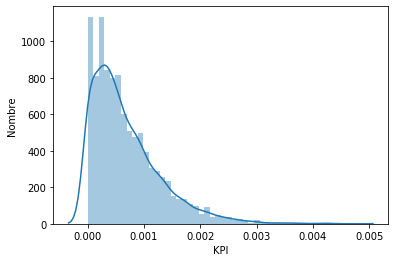

In [28]:
plt.xlabel('KPI')
plt.ylabel('Nombre')
sns.distplot(rank)
plt.savefig(r'C:\Users\SOUKAINA LIDAM\Desktop\repartition2')

In [29]:
#we notice that the distribution is the same as before

In [30]:
rank = []
for i in D.keys():
    rank.append(D[i])
rank.sort(reverse=True)
rank = rank[:600]

In [31]:
#we load the accounts data base using pandas in order to build the graph 
path_2 = r'C:\Users\SOUKAINA LIDAM\Desktop\Viral_Marketing_Data\instagram_accounts.csv'
df = pd.read_csv(path_2)
df


,Unnamed: 0,id_user,nb_followers,nb_following,nb_posts,sex,id_followers,department,email,user_agent,birth_date
0,0,288877,167,58,48,female,"[738818, 134147, 314454, 977416, 926730, 82740...","('64', 'Pyrénées-Atlantiques')",zacharieweber@live.com,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_10_...,06/22/82
1,1,140311,67,72,8,female,"[380289, 341188, 775558, 998151, 246792, 17869...","('03', 'Allier')",hugues65@fontaine.com,Opera/9.55.(X11; Linux i686; wo-SN) Presto/2.9...,01/06/96
2,2,182096,142,95,14,female,"[524806, 968200, 241324, 233490, 188948, 15054...","('27', 'Eure')",gilles11@live.com,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,07/22/61
3,3,208875,249,99,150,male,"[776192, 164353, 989698, 134147, 305670, 65792...","('22', ""Côtes-d'Armor"")",manoncolin@gmail.com,Mozilla/5.0 (Windows NT 4.0; nds-NL; rv:1.9.1....,03/14/75
4,4,960092,96,114,19,female,"[858624, 896013, 138779, 817185, 854563, 88580...","('74', 'Haute-Savoie')",valerie79@guichard.com,Mozilla/5.0 (Android 3.2.1; Mobile; rv:12.0) G...,07/26/67
...,...,...,...,...,...,...,...,...,...,...,...
3042,3042,746387,126,171,109,male,"[841217, 625666, 539654, 194575, 254994, 37378...","('2B', 'Haute-Corse')",christianeferrand@laposte.net,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_3 like M...,06/24/63
3043,3043,404047,237,247,32,female,"[858624, 205828, 675064, 455686, 218120, 38298...","('03', 'Allier')",leroydavid@bouygtel.fr,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,11/14/82
3044,3044,630873,106,120,140,female,"[625666, 888662, 186382, 712719, 254297, 44528...","('18', 'Cher')",alfred35@bouygtel.fr,Opera/8.62.(X11; Linux i686; cy-GB) Presto/2.9...,09/24/93
3045,3045,719594,138,126,180,female,"[841217, 524806, 218120, 845837, 688146, 49000...","('29', 'Finistère')",valerie37@club-internet.fr,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_1 like M...,11/29/00


In [32]:
##We change all the caracters which are in the 'id_followers' into a list of integer
for i in range(len(df['id_followers'])):
    follower=[]
    for j in range(len(df['id_followers'][i].split(','))):
        if j ==0:
            follower.append(int(df['id_followers'][i].split(',')[0].replace('[','')))
        elif j ==len(df['id_followers'][i].split(','))-1:
            follower.append(int(df['id_followers'][i].split(',')[len(df['id_followers'][i].split(','))-1].replace(']','')))
        else:   
            follower.append(int(df['id_followers'][i].split(',')[j]))
        
    df['id_followers'][i]=follower
    

C:\Users\SOUKAINA LIDAM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [33]:
####List of all the IDs of user
user = []
for i in range(len(df['id_user'])):
    user.append(df['id_user'][i])



In [36]:
###Creation of adjacency matrix
mat_ad = np.zeros((len(df['id_user']),len(df['id_user'])))
for i in range(len(df['id_user'])):
    li = np.array(df['id_followers'][i])
    for j in li:
        k = user.index(j)
        mat_ad[k][i]=1

In [ ]:
def diag(M): #to verify that there are no auto-follow, therefore no loops, which is not the case here
    S=0
    for i in range(len(M)):
        S+=M[i][i]
        if M[i][i]==1:
            print(i)
    return S

In [37]:
#to get rid of the loops : the connections between a node and itself
for i in range(len(mat_ad)):
    mat_ad[i][i]=0

In [38]:
mat_ad_1= mat_ad

In [39]:
##Creation of the graph using NetworkX
graphe = nx.DiGraph()
for i in range(len(mat_ad_1)):
    for j in range(len(mat_ad_1)):
        if mat_ad_1[i][j]==1:
            graphe.add_edge(i,j)

In [ ]:
def matrixtolist(M): #transforms the adjacency matrix into 2 lists, to ease the use of NodeXL software to draw the graph
    Following,Followed=[],[]
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j]==1:
                Following.append(i)
                Followed.append(j)
    return Following, Followed

(L1,L2)=matrixtolist(A)


np.savetxt('Following.csv', L1, delimiter=',', fmt='%d')
np.savetxt('Followed.csv', L2, delimiter=',', fmt='%d')

In [ ]:
#here we compute the 4 centralities of each node of the graph created previously using NetworkX predefined functions
a = nx.closeness_centrality(graphe)
b = nx.eigenvector_centrality(graphe)
c = nx.betweenness_centrality(graphe)
d = nx.katz_centrality_numpy(graphe)

In [18]:
#In order to pick out the best centrality to use on other graphs and data bases for instagram marketing we will compute a correlation
##plot between the the scores of the 600 best users and their centralities (for each one of the centralities)
###the centrality with the best correlation will be chosen 
--------------------------------------------------------------------------------------------------------------------------
def corroletion(DD,user,a,b,c,d): #function that associates the centrality degree and the score of each user among the 600 best 
    Y,W,Z,V=[],[],[],[]
    for key in a.keys():
        if user[key] in D.keys():
            for indice in DD:
                if indice[0]==user[key]:
                    Y.append(a[key])
                    W.append(b[key])
                    Z.append(c[key])
                    V.append(d[key])
    return Y,W,Z,V
yy,ww,zz,vv=corroletion(DD,user,a,b,c,d)
print(len(yy))



600


In [131]:
### Same work but taking into account the whole data base 
def corroletion(graph,D,user,a,b,c,d):
  
    X=[]
    Y,W,Z,V=[],[],[],[]
    for key in a.keys():
        if user[key] in D.keys():
            X.append(D[user[key]])
            Y.append(a[key])
            W.append(b[key])
            Z.append(c[key])
            V.append(d[key])
    return X,Y,W,Z,V
X,Y,W,Z,V=corroletion(graphe,D,user,a,b,c,d)
print(len(Y))


1195


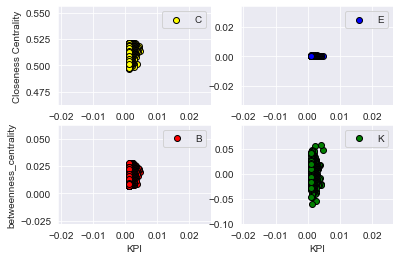

In [28]:
def plot(X,Y,W,Z,V): #Drawing the Corrolation Plots for the 600 best users 
    
    plt.subplot(221)
    plt.scatter(X,Y,color='yellow',marker='o',edgecolors='black')
    plt.xlabel('KPI')
    plt.ylabel('Closeness Centrality')
    plt.legend('Closeness')
    plt.grid('on')
    plt.subplot(222)
    plt.scatter(X,Z,color='b',marker='o',edgecolors='black')
    plt.xlabel('KPI')
    plt.legend('Eigenvector')
    plt.grid('on')
    plt.subplot(223)
    plt.scatter(X,W,color='r',marker='o',edgecolors='black')
    plt.xlabel('KPI')
    plt.ylabel('betweenness_centrality')
    plt.legend('Betweeness centrality')
    plt.grid('on')
    plt.subplot(224)
    plt.scatter(X,V,color='g',marker='o',edgecolors='black')
    plt.xlabel('KPI')
    plt.legend('Katz_centrality')
    plt.grid("on")
    
    plt.savefig(r'C:\Users\Constantine\Desktop\Premier 600\Graphe_couleur.jpg')
    plt.show()
plot(rank,yy,ww,zz,vv)

In [40]:
p=[yy,ww,zz,vv]
titre = ['Closeness','Eigenvector','Betweenness','Katz'] #association of the centrality names to their plots

(600, 2)
(600, 2)
(600, 2)
(600, 2)


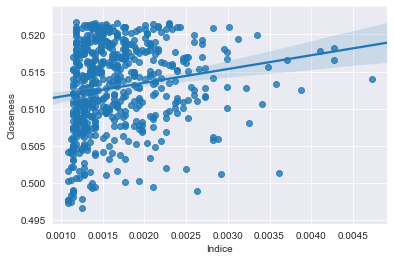

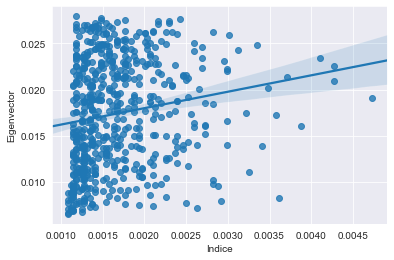

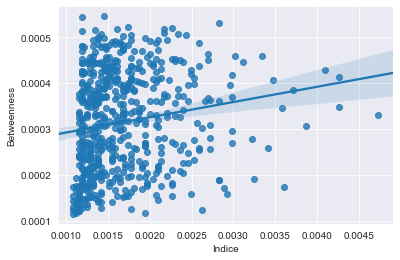

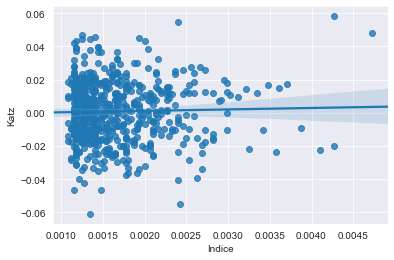

In [41]:
##Creation of a regression line to decide which one of the centrality we're going to keep 
###We deduce according to the regression process that the EigenVector centrality is the one we recommand having a regression slope
###of almost 2/3 superior to the other ones 
for i in range(len(p)):
    plt.figure()
    pro = p[i]
    xy = np.array([rank,pro])
    xy=xy.T
    print(xy.shape)
    xy = pd.DataFrame(xy,columns=('Indice',titre[i]))
    sns.set_style('dark')
    plt.grid('on')
    sns.regplot(x='Indice',y=titre[i],data=xy)
    plt.savefig(r'C:\Users\Constantine\Desktop\Premier 600\{}-Indice_Pre_600.jpg'.format(titre[i]))


In [ ]:
#here we will build a function,based on the maximum expected size of the maximum sets,that will help us evaluate our methodology 
def calcul_centrality_best(graph,M):
    dic1=nx.eigenvector_centrality(graph)
    dict2=sorted(dic1.items(), key=lambda t: t[1])
    return dict2[-M:]

#Inspired by DFS compute the expected size of ﬁnal active set 
print(list(calcul_centrality_best(graphe,20)))
def calcul_f(graph,M):
    L=calcul_centrality_best(graph,M)
    S=[]
    for i in range(len(L)):
        S.append(L[i][0])
    visited=[S[0]]
    lnext=[S[0]]
    Fs=[]
    while len(lnext)>0:
        x=lnext.pop()
        for (i,x) in graph.edges():
            if i not in visited:
                Fs.append(i)
                lnext.append(i)
    return len(Fs)
                
    

[(2954, 0.027232510081242164), (781, 0.02725454878682179), (828, 0.027255266610010546), (2656, 0.02731513948765251), (1922, 0.027326949504949835), (1082, 0.02735513640219718), (2029, 0.027376907039454994), (3, 0.027378878296244368), (726, 0.02738484625376666), (734, 0.027409781877452168), (1319, 0.027455901559627023), (2307, 0.02748534415999788), (2309, 0.027488226183133166), (1514, 0.027512184838458076), (1167, 0.027545559316828307), (2370, 0.027608629194148627), (1336, 0.027680460039190957), (950, 0.02777561124969461), (664, 0.027909005220134477), (109, 0.02792696888592518)]
